# Importing the data

In [25]:
import pandas as pd

path = 'C:\\Users\\ASAD COMPUTERS\\Downloads\\marriage_divorce_india_with_id.csv'
df = pd.read_csv(path)
df.head(10)

,Unique ID,Marriage Duration (Years),Age at Marriage,Marriage Type,Education Level,Income Level (INR per month),Caste/Religion,Urban/Rural,Family Involvement,Children,Divorce Status
0,MD1,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2,No
1,MD2,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0,Yes
2,MD3,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4,Yes
3,MD4,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1,Yes
4,MD5,21,34,Love,Secondary,28666,Jain,Urban,High,1,Yes
5,MD6,39,32,Arranged,Graduate,63817,Hindu,Rural,Moderate,1,No
6,MD7,19,29,Arranged,Secondary,96198,Christian,Rural,Moderate,0,No
7,MD8,23,33,Arranged,Postgraduate,170714,Jain,Urban,High,3,No
8,MD9,11,25,Arranged,No Education,46830,Other,Urban,High,2,Yes
9,MD10,11,34,Arranged,Postgraduate,15234,Jain,Rural,High,0,Yes


# Data Preprocessing

In [26]:
df.isnull().sum()

Unique ID                       0
Marriage Duration (Years)       0
Age at Marriage                 0
Marriage Type                   0
Education Level                 0
Income Level (INR per month)    0
Caste/Religion                  0
Urban/Rural                     0
Family Involvement              0
Children                        0
Divorce Status                  0
dtype: int64

In [27]:
#Aoplying one_hot_encoding on 'Marriage Type ' column
one_hot_encoded = pd.get_dummies(df['Marriage Type'], prefix='Marriage_Type')

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

In [28]:
df.head(5)

,Unique ID,Marriage Duration (Years),Age at Marriage,Marriage Type,Education Level,Income Level (INR per month),Caste/Religion,Urban/Rural,Family Involvement,Children,Divorce Status,Marriage_Type_Arranged,Marriage_Type_Love
0,MD1,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2,No,False,True
1,MD2,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0,Yes,True,False
2,MD3,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4,Yes,False,True
3,MD4,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1,Yes,True,False
4,MD5,21,34,Love,Secondary,28666,Jain,Urban,High,1,Yes,False,True


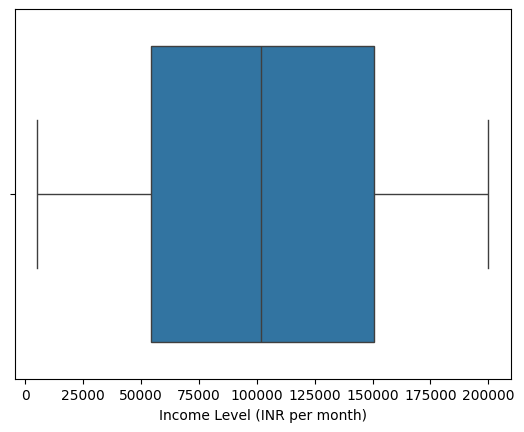

In [29]:
# Removing outliers from income column
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Income Level (INR per month)'])
plt.show()

In [30]:
# df.drop('Family Involvement', axis=1, inplace= True)

<Axes: xlabel='Divorce Status', ylabel='count'>

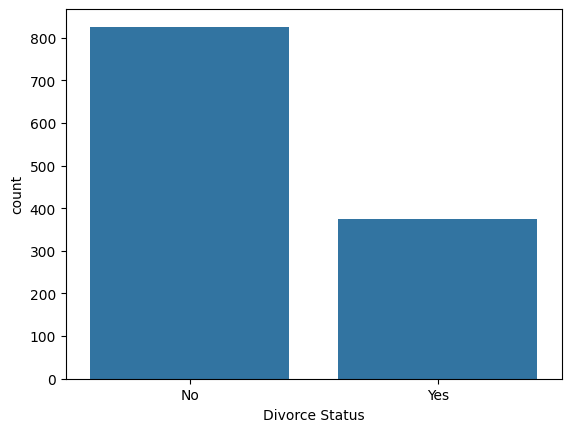

In [31]:
sns.countplot(data=df, x='Divorce Status')

In [32]:
# Group by Education Level and calculate average Marriage Duration
education_avg_duration = df.groupby('Education Level')['Marriage Duration (Years)'].mean()
print(education_avg_duration)

Education Level
Graduate        20.705357
No Education    21.174089
Postgraduate    20.302419
Primary         20.192982
Secondary       20.383399
Name: Marriage Duration (Years), dtype: float64


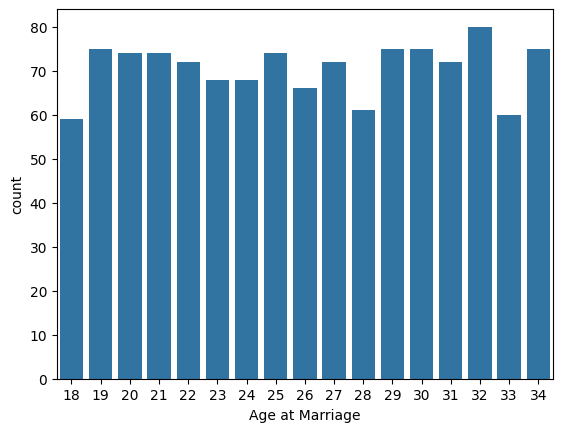

(None,)

In [33]:
sns.countplot(data=df, x='Age at Marriage')
plt.show(), 

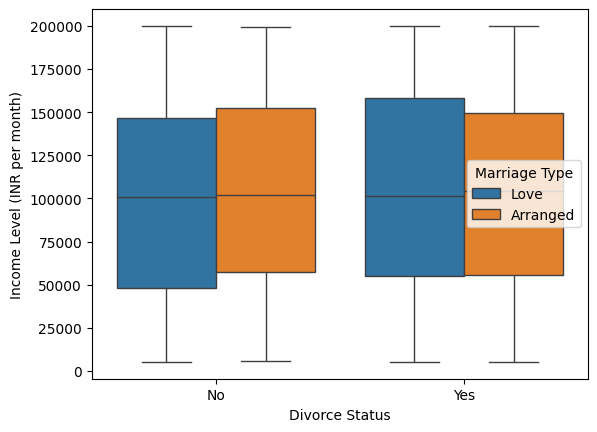

In [34]:
sns.boxplot(x='Divorce Status', y='Income Level (INR per month)', data=df, hue="Marriage Type")
plt.show()

<Axes: xlabel='Age at Marriage', ylabel='Count'>

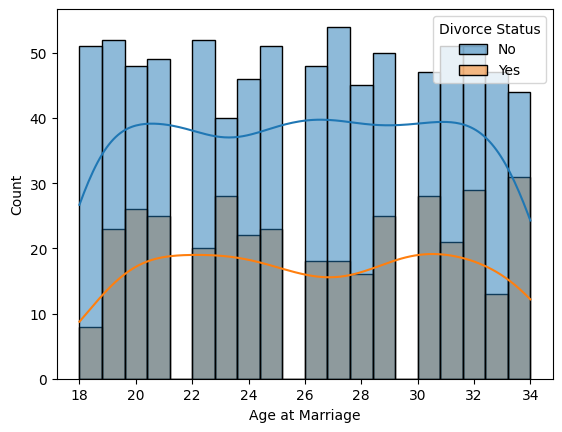

In [35]:
sns.histplot(data=df, x='Age at Marriage', hue='Divorce Status', kde=True, bins=20)

In [36]:
caste_avg_duration = df.groupby('Caste/Religion')['Marriage Duration (Years)'].mean()
print(caste_avg_duration)

Caste/Religion
Christian    20.094737
Hindu        19.806931
Jain         20.502392
Muslim       20.734177
Other        20.500000
Sikh         21.839286
Name: Marriage Duration (Years), dtype: float64


# Urban/Rural Spit

<Axes: ylabel='count'>

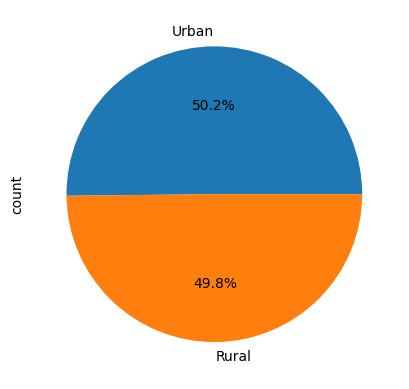

In [37]:
df['Urban/Rural'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='Urban/Rural', ylabel='count'>

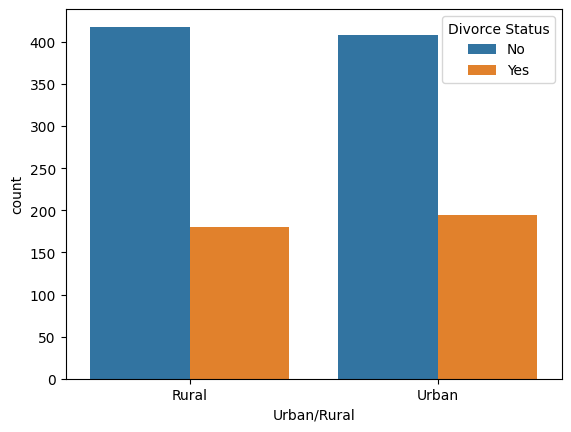

In [38]:
sns.countplot(x='Urban/Rural', hue='Divorce Status', data=df)

In [39]:
df.drop('Urban/Rural', axis=1, inplace=True)

# Caste/Religion vs Divorce Status

<Axes: xlabel='Caste/Religion', ylabel='count'>

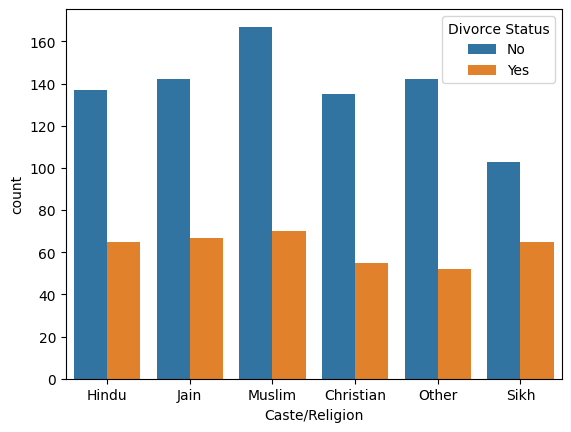

In [40]:
sns.countplot(x='Caste/Religion', hue='Divorce Status', data=df)

<Axes: xlabel='Marriage Type'>

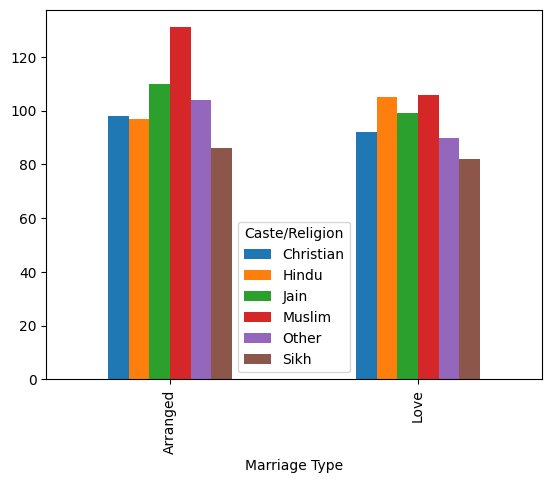

In [41]:
pd.crosstab(df['Marriage Type'], df['Caste/Religion']).plot(kind='bar')

In [42]:
# Calculate divorce rates
divorce_rate = df['Divorce Status'].value_counts(normalize=True) * 100
print(divorce_rate)


Divorce Status
No     68.833333
Yes    31.166667
Name: proportion, dtype: float64


# Predictive Modeling

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Select features and target variable
X = df[['Marriage Duration (Years)', 'Age at Marriage', 'Marriage_Type_Arranged', 'Marriage_Type_Love','Income Level (INR per month)']]
y = df['Divorce Status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.7125
Confusion Matrix:
[[171   0]
 [ 69   0]]


C:\Users\ASAD COMPUTERS\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Saving the Model

In [44]:
import joblib

# Save the model
joblib.dump(model, 'model.pkl')


['model.pkl']